
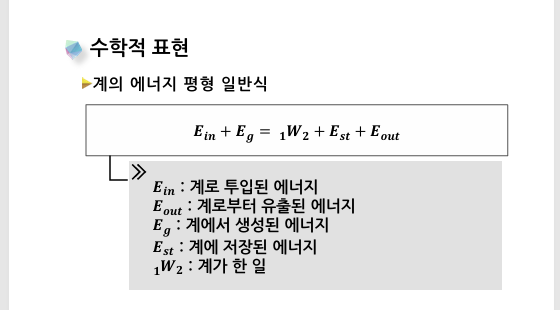

### **기체의 팽창 및 압축**
-  **밀폐계에서의 일**
-  실린더 내의 압력(P)이 상승하면 압력이 피스톤의 면적(A)에 작용.
-  피스톤이 축방향으로 미소 거리(ds)만큼 이동하고 체적변화(dV)가 발생.
-  피스톤의 운동으로 외부에 일을 하게 됨.
-  밀폐계의 일은 절대일(absolute work), 팽창일, 비부등일이라고 함.
-  **수학적 표현**
-  계의 에너지 평형 일반식:
-  $E_{in} +E_g =1W_2 +E_{st} +E_{out}$ ​
-  $E_{in}$ ​: 계로 투입된 에너지
-  $E_{out}$ ​: 계로부터 유출된 에너지
-  $E_g$ ​: 계에서 생성된 에너지
-  $E_{st}$ : 계에 저장된 에너지
-  $1W_2$ ​: 계가 한 일

<p style="text-align:left">
   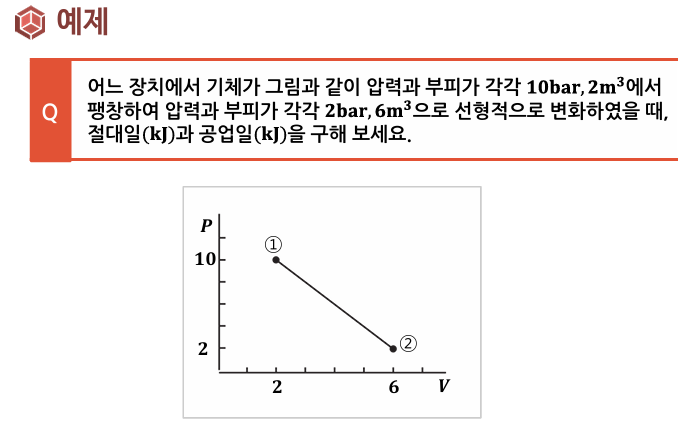
</p>


**시간에 따른 선형 변화**

-  압력과 부피가 각각 시간에 따라 선형적으로 변화한다고 가정하면, 다음과 같이 표현할 수 있습니다:
-  압력 $P(t)$ 는 시간에 따라 선형적으로 변화:

 $P(t)=P_1 +(P_2 -P_1 )\cdot \frac{t}{t_f }$ ​

-  부피 V(t)V(t)V(t)는 시간에 따라 선형적으로 변화:

 $V(t)=V_1 +(V_2 -V_1 )\cdot \frac{t}{t_f }$ ​


여기서는 $t$ 시간, $t_f$ 는 최종 시간, P1P\_1P1​와 P2P\_2P2​는 초기 및 최종 압력, $V_1$ 와 $V_2$ 는 초기 및 최종 부피입니다.


 **2.** **절대일 계산**


절대일은 $\int_{V_1 }^{V_2 } PdV$ 로 정의됩니다. 시간에 따라 압력과 부피가 선형적으로 변화할 때, 이를 다음과 같이 적분할 수 있습니다.


$$W_{abs} =\int_0^{t_f } P(t)\frac{dV(t)}{dt}dt$$

여기서


$$\frac{dV(t)}{dt}=\frac{V_2 -V_1 }{t_f }dt$$

이므로, 압력과 부피의 선형 변화를 반영한 절대일 식은 다음과 같습니다.


 **3.** **공업일 계산**


공업일은 절대일의 계산에서 추가적으로 초기 상태와 최종 상태에서 발생하는 일을 반영합니다:


 $W_t =P_1 \cdot V_1 +\int_0^{t_f } P(t)\frac{dV(t)}{dt}dt-P_2 \cdot V_2$ ​


In [1]:
% 변수 설정
P1 = 10 * 100;  % P1 in kPa (10 bar -> 10 * 100 kPa)
P2 = 2 * 100;   % P2 in kPa (2 bar -> 2 * 100 kPa)
V1 = 2;         % V1 in m^3
V2 = 6;         % V2 in m^3
tf = 15;        % 최종 시간, 10초로 연장
dt = 0.1;      % 시간 간격 (0.05초로 더 촘촘하게)
numSteps = tf / dt;  % 애니메이션 스텝 수

% 시간에 따른 선형 변화
t = linspace(0, tf, numSteps);  % 시간 벡터
P_t = P1 + (P2 - P1) .* (t / tf);  % 선형적으로 변화하는 압력
V_t = V1 + (V2 - V1) .* (t / tf);  % 선형적으로 변화하는 부피

% 절대일 계산
dV_dt = (V2 - V1) / tf;  % 부피 변화율
W_abs = trapz(t, P_t .* dV_dt);  % 전체 절대일 계산

% 최종 상태에서 절대일 계산
W_abs_final = W_abs - P2 * (V2-V1) + V1 * (P1 - P2);

% 동적 그래프 설정
figure;
hold on;
h_line = plot(V1, P1, 'o-', 'LineWidth', 2);  % 초기 점 설정
xlabel('Volume (m^3)');
ylabel('Pressure (kPa)');
title('Time-varying P-V Diagram with Extended Time');
xlim([V1-1 V2+1]);
ylim([0 P1 + 100]);
grid on;

% 면적을 표시할 패치 객체 생성 (동적 면적 표시)
h_area = fill([V1 V1], [P1 P1], 'r', 'FaceAlpha', 0.3, 'EdgeColor', 'none');

% 동적 그래프 업데이트
for i = 1:numSteps
    % 현재 볼륨과 압력을 갱신
    set(h_line, 'XData', V_t(1:i), 'YData', P_t(1:i));

    % 현재까지의 면적 채우기
    set(h_area, 'XData', [V1, V_t(1:i), flip(V_t(1:i))], 'YData', [P1, P_t(1:i), zeros(1,i)]);

    % 텍스트 업데이트 (동적 압력 및 부피 값)
    if i > 1
        delete(findall(gcf, 'type', 'text'));  % 이전 텍스트 삭제
    end
    text(V_t(i), P_t(i), sprintf('t = %.2f s\nV = %.2f m^3\nP = %.2f kPa', t(i), V_t(i), P_t(i)), ...
        'HorizontalAlignment', 'center', 'VerticalAlignment', 'bottom');

    % 화면 갱신
    pause(0.05);  % 애니메이션 속도 조절 (0.05초로 더 천천히)
end

% 절대일 출력
fprintf('절대일: %.2f kJ\n', W_abs);

절대일: 2400.00 kJ

In [2]:

% 공업일 출력
fprintf('공업일: %.2f kJ\n', W_abs_final);

공업일: 3200.00 kJ


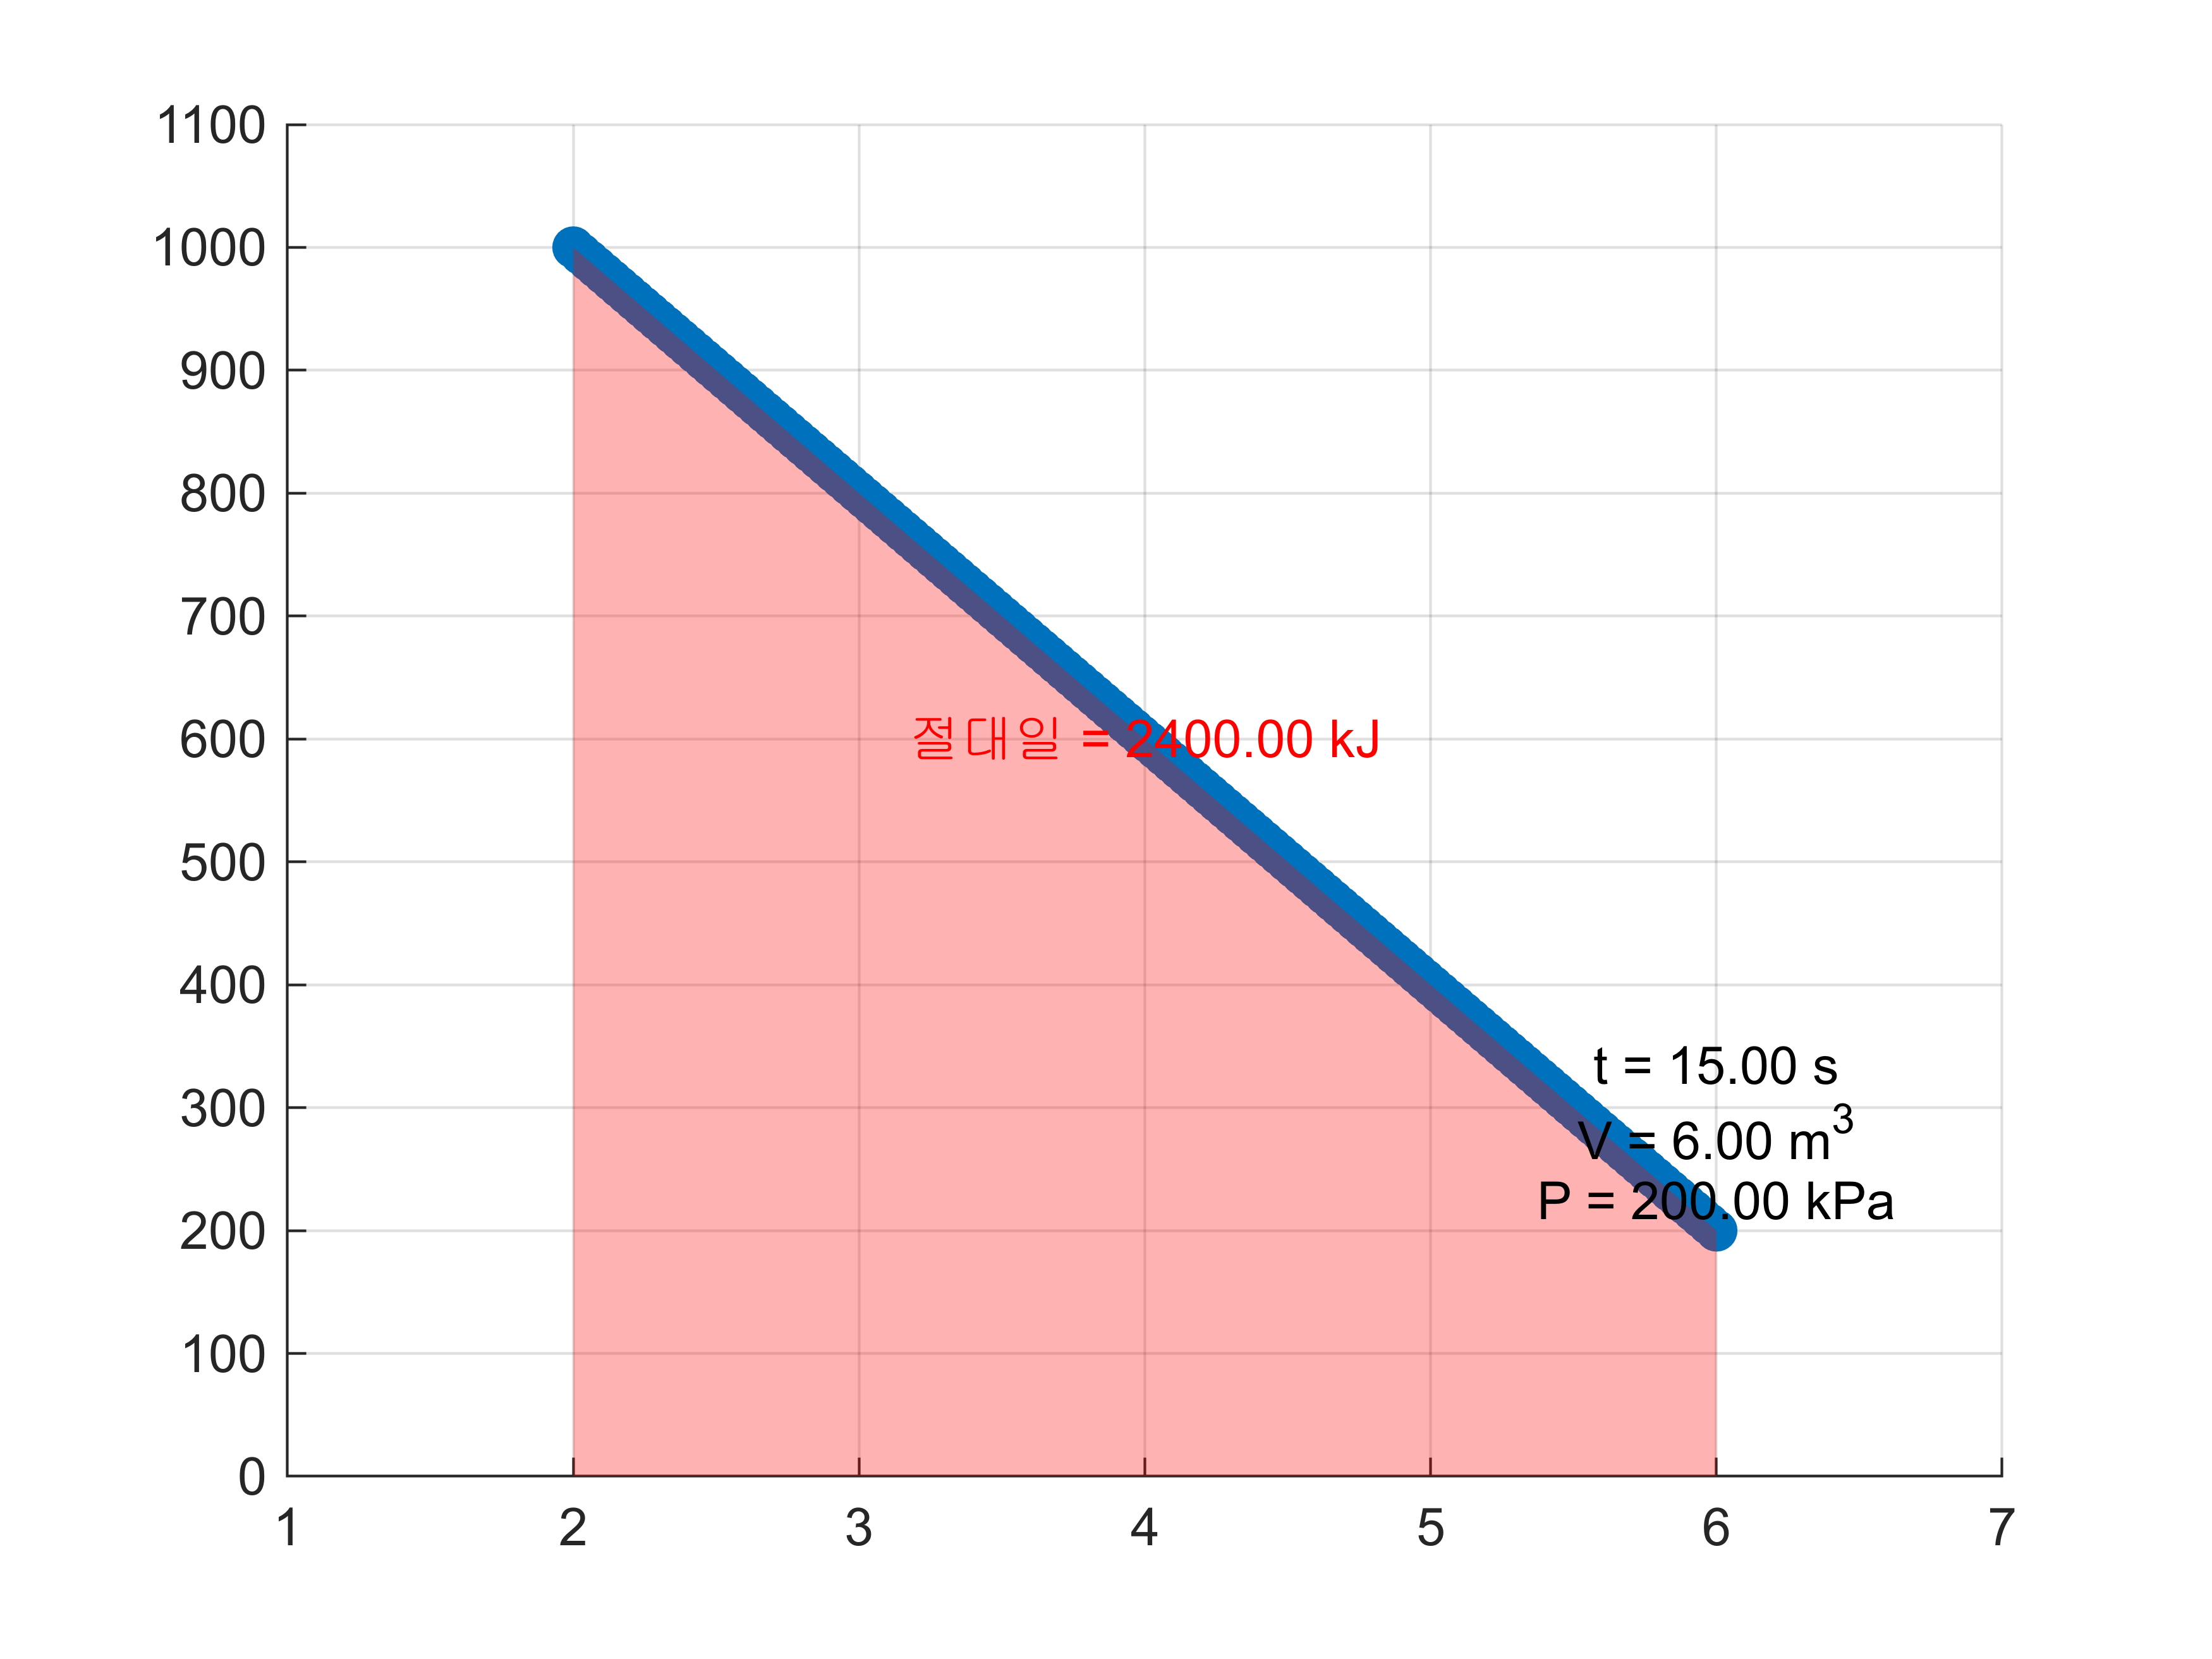

In [3]:

% 동적 그래프 설명
text(mean(V_t), mean(P_t), sprintf('절대일 = %.2f kJ', W_abs), 'HorizontalAlignment', 'center', 'Color', 'r');
hold off;

In [4]:
% 변수 설정
P1 = 10 * 100;  % P1 in kPa (10 bar -> 10 * 100 kPa)
P2 = 2 * 100;   % P2 in kPa (2 bar -> 2 * 100 kPa)
V1 = 2;         % V1 in m^3
V2 = 6;         % V2 in m^3
tf = 15;        % 최종 시간, 15초로 설정
dt = 0.1;       % 시간 간격 (0.1초로 설정)
numSteps = tf / dt;  % 애니메이션 스텝 수

% 시간에 따른 선형 변화
t = linspace(0, tf, numSteps);  % 시간 벡터
P_t = P1 + (P2 - P1) .* (t / tf);  % 선형적으로 변화하는 압력
V_t = V1 + (V2 - V1) .* (t / tf);  % 선형적으로 변화하는 부피

% 공업일 계산: 절대일처럼 계산된 면적 사용 (왼쪽 직사각형 포함, 빨간색 부분 제외)
W_t = trapz(V_t, P_t) + P1 * V1 - P2 * (V2 - V1);  % 공업일 계산 (정확한 면적)

% 동적 그래프 설정
figure;
hold on;
h_line = plot(V1, P1, 'o-', 'LineWidth', 2);  % 초기 점 설정
xlabel('Volume (m^3)');
ylabel('Pressure (kPa)');
title('Time-varying P-V Diagram with Adjusted Technical Work Area');
xlim([V1-1 V2+1]);
ylim([0 P1 + 100]);
grid on;

% 공업일 면적을 표시할 패치 객체 생성 (초기화)
h_area_t = fill([V1 V1], [P1 P1], 'g', 'FaceAlpha', 0.5, 'EdgeColor', 'none', 'DisplayName', '공업일');
%h_area_left = fill([0 V1 V1 0], [P2 P2 P1 P1], 'g', 'FaceAlpha', 0.5, 'EdgeColor', 'none', 'DisplayName', '왼쪽 직사각형');

% 동적 그래프 업데이트 (공업일만 표시)
for i = 1:numSteps
    % 현재 볼륨과 압력을 갱신
    set(h_line, 'XData', V_t(1:i), 'YData', P_t(1:i));

    % 공업일 면적 업데이트 (시간에 따라 채워짐)
    set(h_area_t, 'XData', [-100000, V_t(1:i), V_t(i), V1], 'YData', [P1, P_t(1:i), P2, P2]);

    % 텍스트 업데이트 (동적 압력 및 부피 값)
    if i > 1
        delete(findall(gcf, 'type', 'text'));  % 이전 텍스트 삭제
    end
    text(V_t(i), P_t(i), sprintf('t = %.2f s\nV = %.2f m^3\nP = %.2f kPa', t(i), V_t(i), P_t(i)), ...
        'HorizontalAlignment', 'center', 'VerticalAlignment', 'bottom');

    % 화면 갱신
    pause(0.05);  % 애니메이션 속도 조절 (0.05초로 더 천천히)
end

% 공업일 출력
fprintf('공업일: %.2f kJ\n', W_t);

공업일: 3600.00 kJ


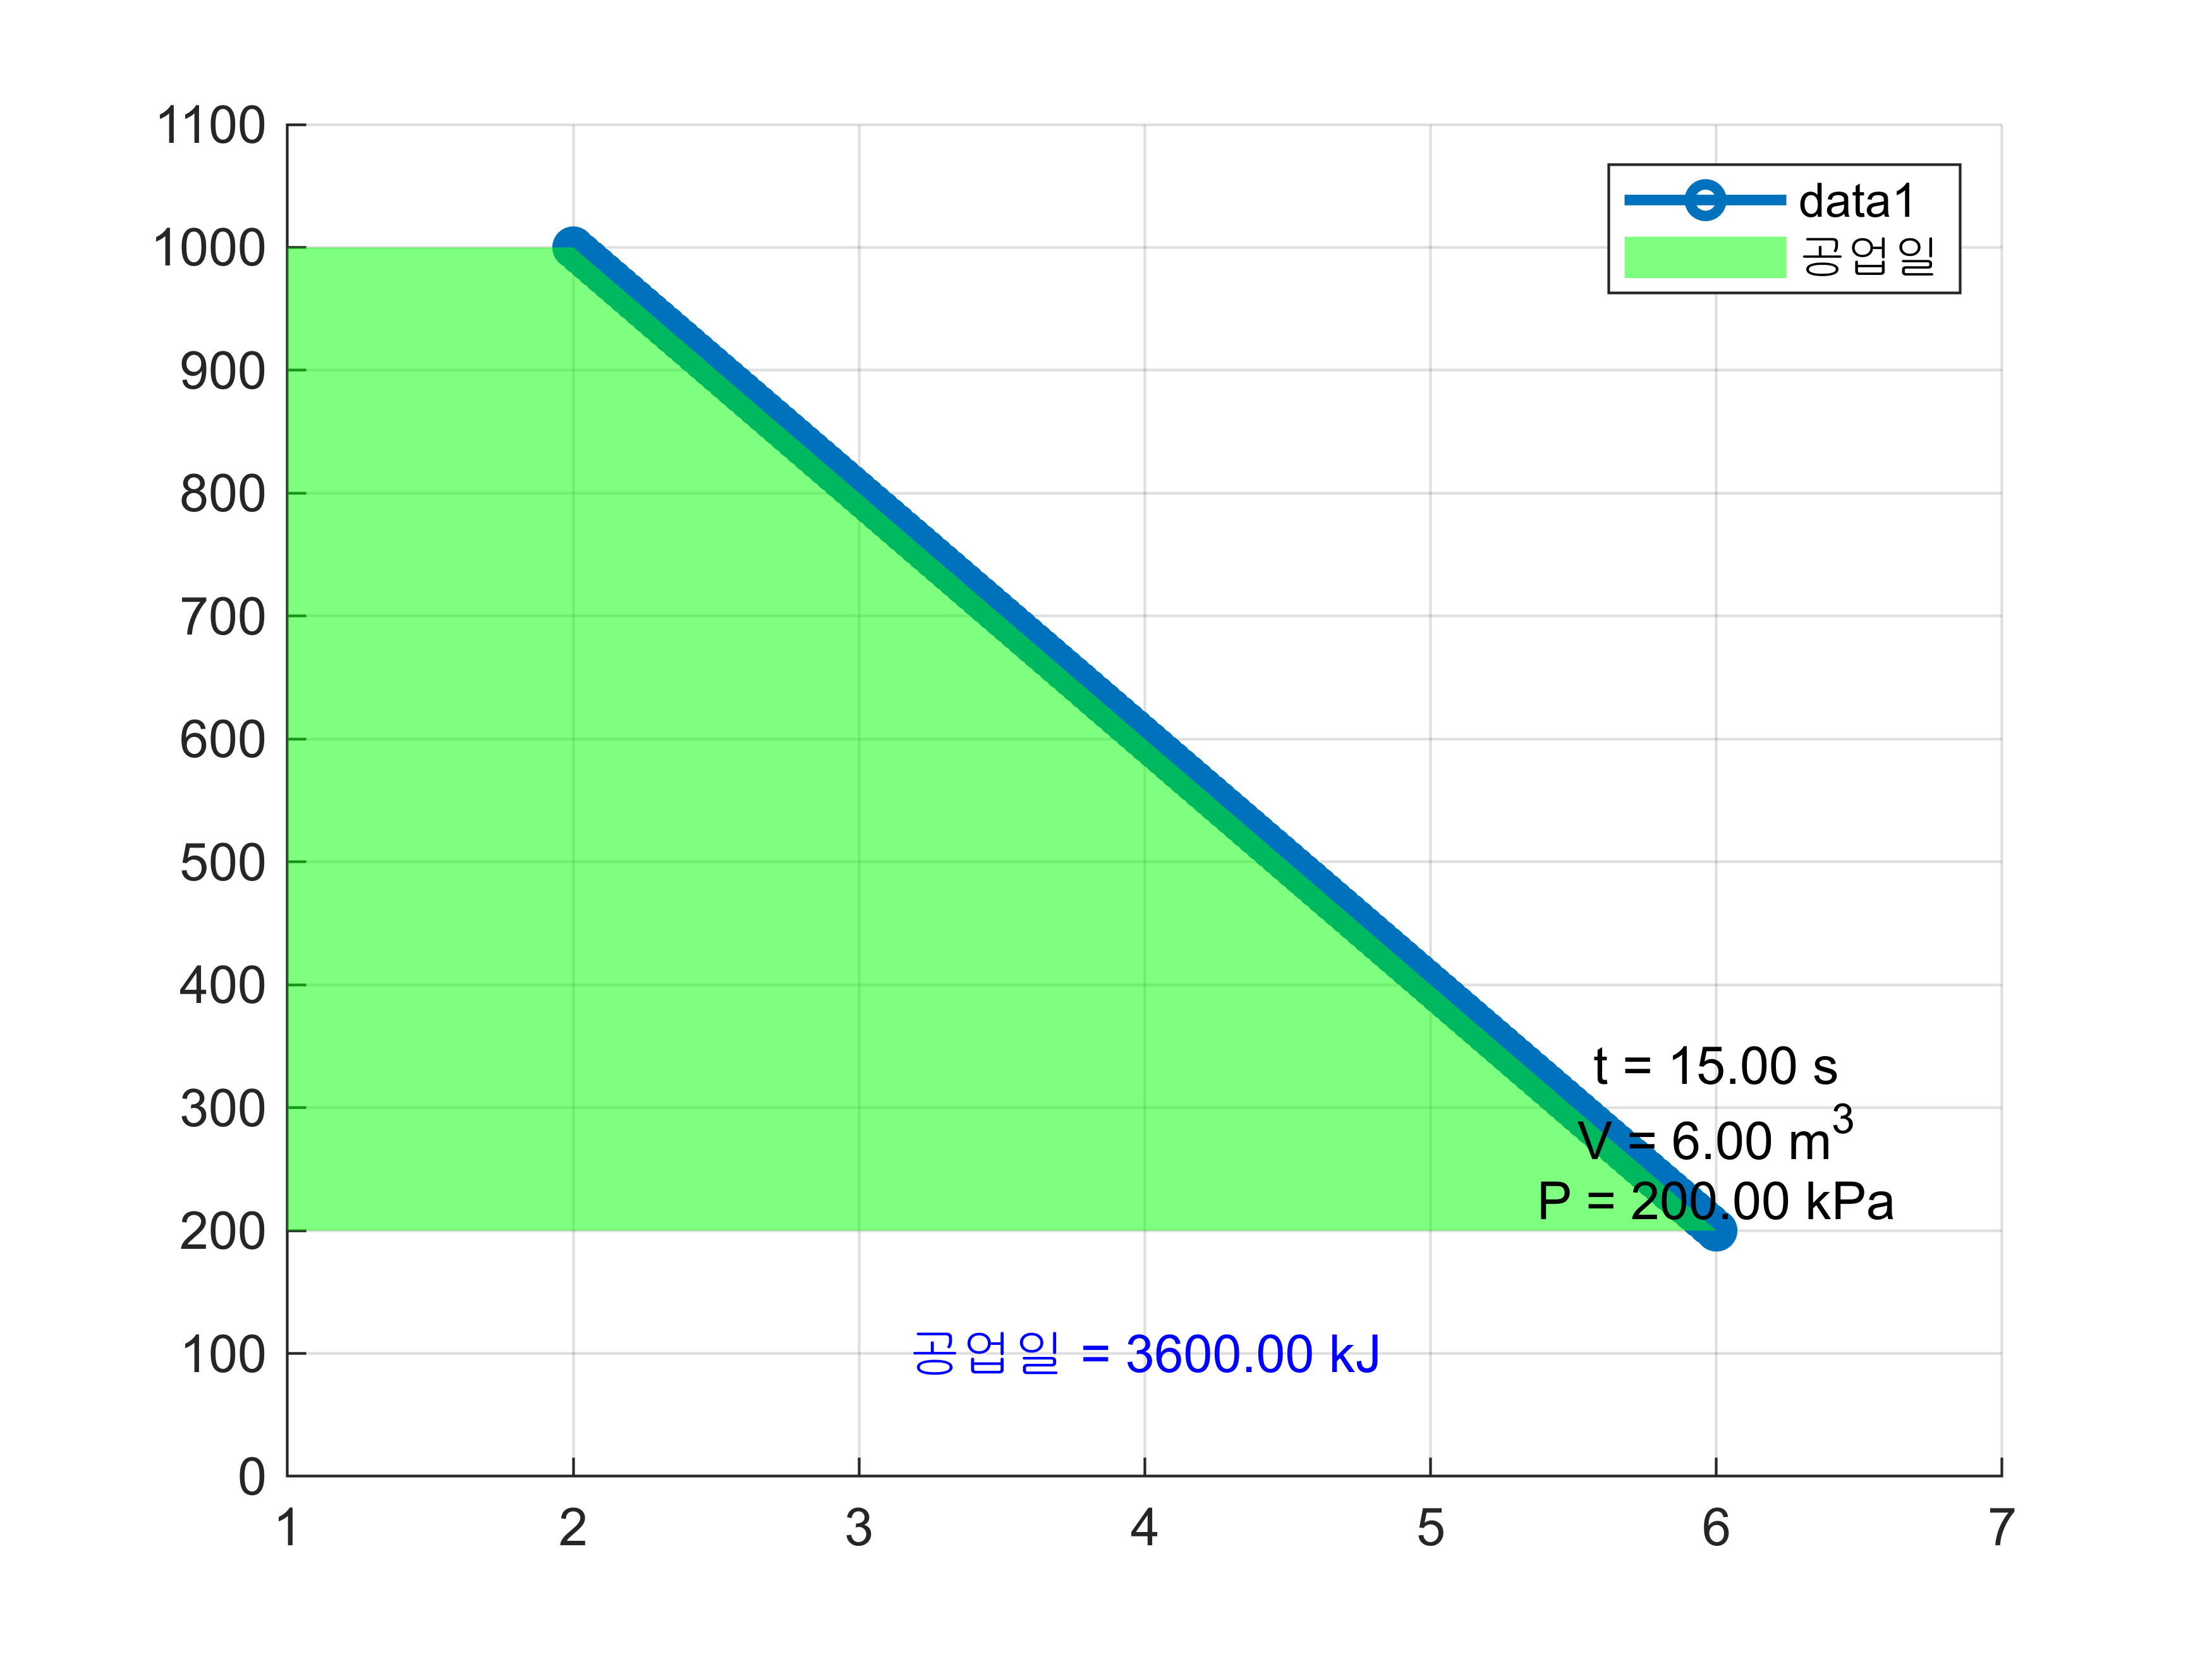

In [5]:

% 동적 그래프 설명
text(mean(V_t), P2/2, sprintf('공업일 = %.2f kJ', W_t), 'HorizontalAlignment', 'center', 'Color', 'b');
legend('show');
hold off;

In [6]:

% 변수 설정
P1 = 10 * 100;  % P1 in kPa (10 bar -> 10 * 100 kPa)
P2 = 2 * 100;   % P2 in kPa (2 bar -> 2 * 100 kPa)
V1 = 2;         % V1 in m^3
V2 = 6;         % V2 in m^3
tf = 15;        % 최종 시간, 15초로 설정
dt = 0.1;       % 시간 간격 (0.1초로 설정)
numSteps = tf / dt;  % 애니메이션 스텝 수

% 시간에 따른 선형 변화
t = linspace(0, tf, numSteps);  % 시간 벡터
P_t = P1 + (P2 - P1) .* (t / tf);  % 선형적으로 변화하는 압력
V_t = V1 + (V2 - V1) .* (t / tf);  % 선형적으로 변화하는 부피

% 절대일 계산 (삼각형 영역만)
W_abs = trapz(V_t, P_t);  % 절대일은 압력과 부피 변화에 대한 적분으로 계산

% 공업일 계산: 절대일 + 왼쪽 직사각형 영역 추가
W_t = W_abs + P1 * V1 - P2 * (V2 - V1);  % 공업일은 절대일을 포함하여 왼쪽 직사각형 추가

% 동적 그래프 설정
figure;
hold on;
h_line = plot(V1, P1, 'o-', 'LineWidth', 2);  % 초기 점 설정
xlabel('Volume (m^3)');
ylabel('Pressure (kPa)');
title('Time-varying P-V Diagram with Absolute and Technical Work');
xlim([V1-1 V2+1]);
ylim([0 P1 + 100]);
grid on;

% 공업일과 절대일을 표시할 패치 객체 생성 (초기화)
h_area = fill([V1 V1], [P1 P1], 'r', 'FaceAlpha', 0.3, 'EdgeColor', 'none', 'DisplayName', '절대일');
h_area_t = fill([V1 V1], [P1 P1], 'g', 'FaceAlpha', 0.5, 'EdgeColor', 'none', 'DisplayName', '공업일');

% 동적 그래프 업데이트 (공업일과 절대일 표시)
for i = 1:numSteps
    % 현재 볼륨과 압력을 갱신
    set(h_line, 'XData', V_t(1:i), 'YData', P_t(1:i));

    % 절대일 면적 업데이트 (삼각형 영역만)
    set(h_area, 'XData', [V1, V_t(1:i), flip(V_t(1:i))], 'YData', [P1, P_t(1:i), zeros(1,i)]);

    % 공업일 면적 업데이트 (왼쪽 직사각형 + 삼각형)
    set(h_area_t, 'XData', [-100000, V_t(1:i), V_t(i), V1], 'YData', [P1, P_t(1:i), P2, P2]);

    % 텍스트 업데이트 (동적 압력 및 부피 값)
    if i > 1
        delete(findall(gcf, 'type', 'text'));  % 이전 텍스트 삭제
    end
    text(V_t(i), P_t(i), sprintf('t = %.2f s\nV = %.2f m^3\nP = %.2f kPa', t(i), V_t(i), P_t(i)), ...
        'HorizontalAlignment', 'center', 'VerticalAlignment', 'bottom');

    % 화면 갱신
    pause(0.05);  % 애니메이션 속도 조절 (0.05초로 더 천천히)
end

% 절대일과 공업일 출력
fprintf('절대일: %.2f kJ\n', W_abs);

절대일: 2400.00 kJ

In [7]:
fprintf('공업일: %.2f kJ\n', W_t);

공업일: 3600.00 kJ


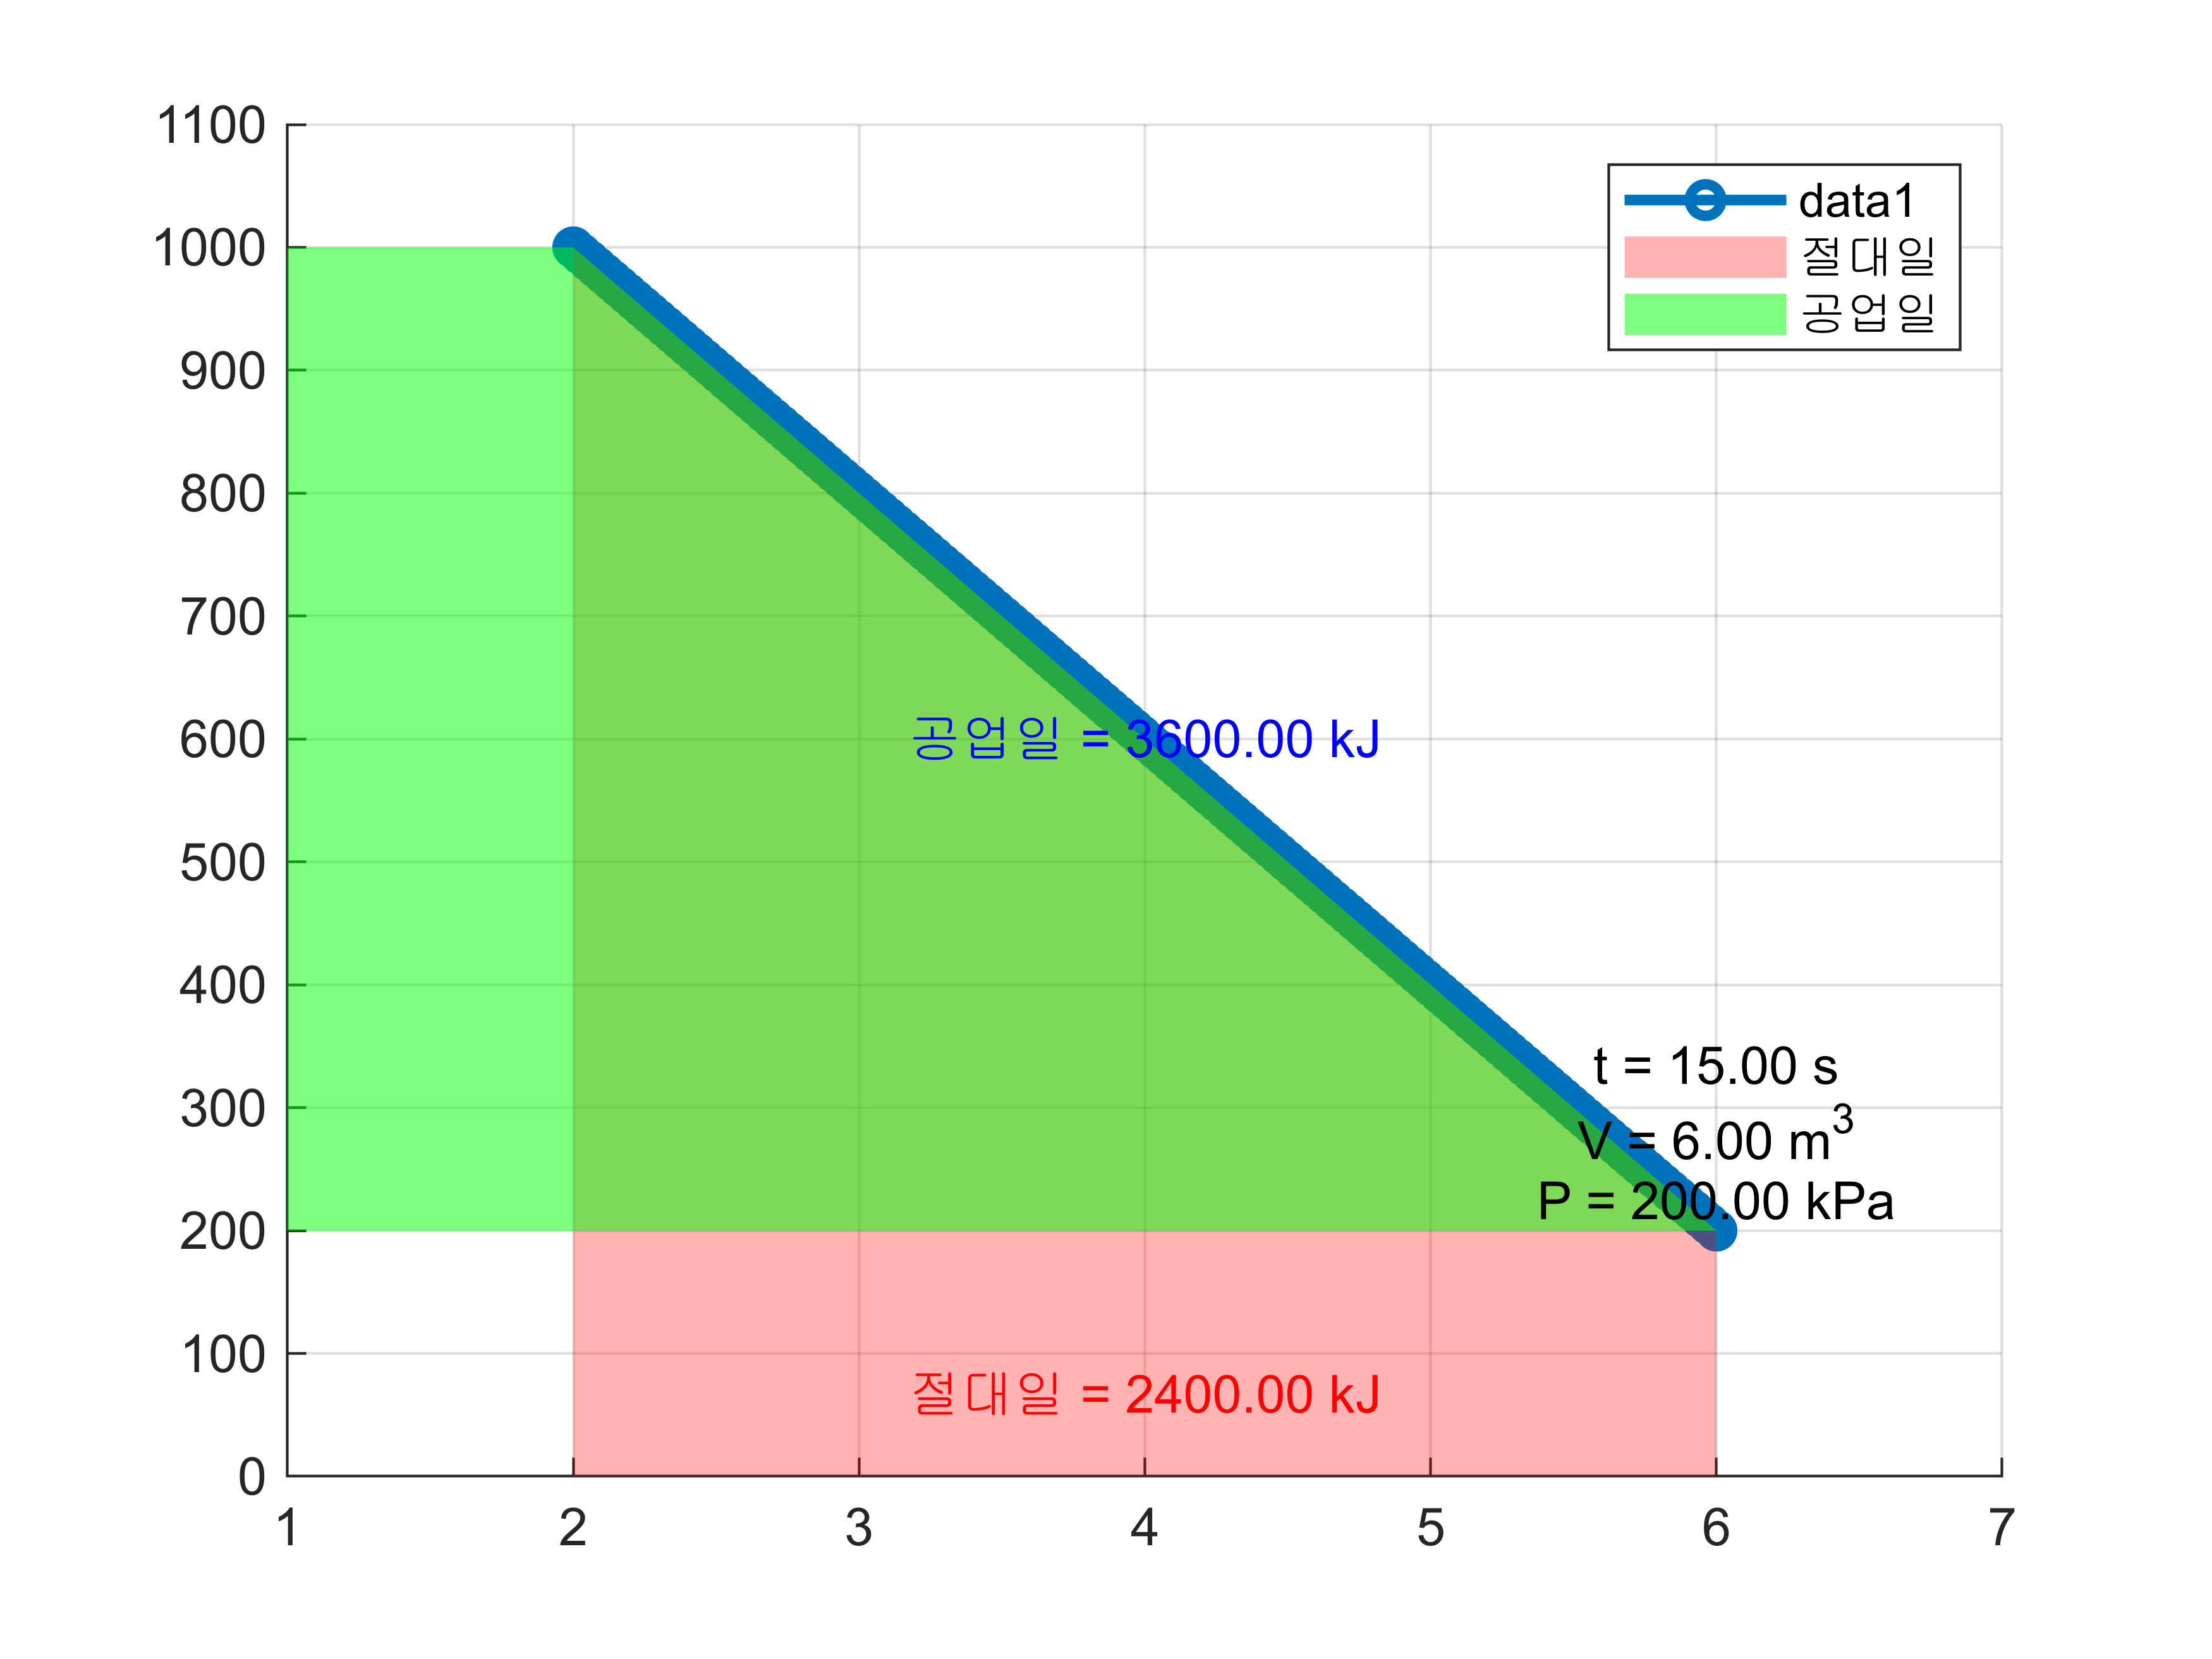

In [8]:

% 동적 그래프 설명
text(mean(V_t), P2/3, sprintf('절대일 = %.2f kJ', W_abs), 'HorizontalAlignment', 'center', 'Color', 'r');
text(mean(V_t), mean(P_t), sprintf('공업일 = %.2f kJ', W_t), 'HorizontalAlignment', 'center', 'Color', 'b');
legend('show');
hold off;


**1.** **줄\-톰슨 효과 (Joule\-Thomson Effect)****:**


줄\-톰슨 효과는 1854년에 실험적으로 발견된 열역학적 현상으로, **이상기체**에서는 엔탈피가 일정한 상태에서 압력 변화를 줄 때 온도 변화가 일어나지 않지만, **실제 기체**에서는 압력 변화에 따라 온도가 변하는 현상을 의미합니다.


**줄\-톰슨 효과의 특징:**

-  **이상기체**에서는 엔탈피가 압력 변화와 상관없이 일정하므로, 압력 변화 시에도 온도가 변하지 않습니다.
-  **실제 기체**에서는 분자 간 상호작용으로 인해 압력 변화 시 온도가 변하는데, 이는 주로 기체의 성질에 따라 결정됩니다. 압력을 낮추면 온도가 **감소**하거나 **증가**할 수 있습니다.
-  예시: 냉동기나 에어컨에서 냉매를 압축한 후 팽창시키면 온도가 급격히 낮아지면서 냉각 효과를 발생시키는 것이 이 현상입니다.

**적용 사례:**

-  **냉동기**에서 냉매로 사용하는 물질(예: 이산화탄소, 암모니아 등)은 줄\-톰슨 효과에 의해 팽창하면서 온도가 낮아져 냉각 효과를 발생시킵니다.
-  **유체 팽창**을 통해 온도를 낮추는 다양한 산업 응용에서도 사용됩니다.

 **2.** **줄\-톰슨 계수 (Joule\-Thomson Coefficient)****:**


줄\-톰슨 계수는 압력 변화에 따른 온도 변화를 나타내는 계수로 정의됩니다.


 $\mu_J ={\left(\frac{\partial T}{\partial P}\right)}_H$ ​

-  \*\* $\mu$ \*\*는 줄\-톰슨 계수입니다.
-  이는 **등엔탈피 조건**에서 압력에 따른 온도 변화율을 나타냅니다.

**줄\-톰슨 계수의 의미:**

1.  $\mu_J >0$ (양수인 경우): 압력이 증가하면 온도가 **낮아지는** 현상.

-  주로 냉매와 같은 실제 기체에서 발생하며, 냉각 효과를 유도합니다.

1.  $\mu_J =0$ (0인 경우): 압력 변화에 따라 온도 변화가 **없음**.

-  이는 **이상기체**에서 관찰되는 현상으로, 줄\-톰슨 효과가 나타나지 않습니다.

1.  $\mu_J <0$ (음수인 경우): 압력이 증가하면 온도가 **높아지는** 현상.

-  일부 기체에서 압축될 때 온도가 상승하는 경우입니다.

 **3.** **압력에 따른 온도 변화****:**


압력 변화에 따른 온도 변화는 줄\-톰슨 계수에 의해 결정됩니다.

-  **양수**: 압력 증가 시 온도 감소.
-  **0**: 압력 변화에 따른 온도 변화 없음 (이상기체).
-  **음수**: 압력 증가 시 온도 증가
